In [35]:
import os
import PyImbalReg as pir
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("/home/usr/Documents/reg-class-fault-detection/dataset/kpi_fuller_df.csv")

In [37]:
def label_func(faultD):
  if(faultD == 0): return 0
  elif(faultD < 500): return 1
  else: return 2

In [38]:
df = df.sample(frac=1)
test_data = df[:(len(df)//5)]
train_data = df[(len(df)//5):]

In [39]:
test_data['fault'] = test_data['fault_duration'].apply(label_func)
test_data = test_data.drop(columns=['Unnamed: 0','NE ID','endTime', 'relation'])

X_test = test_data.drop(columns=['fault_duration']).values
y_test_fd = test_data.fault_duration.values
y_test = test_data.fault_duration.apply(label_func).values



t1 = test_data[test_data['fault'] == 0]
t2 = test_data[test_data['fault'] == 1]
t3 = test_data[test_data['fault'] == 2]

t1 = t1.sample(frac=0.045)

test_df = pd.concat([t1,t2,t3])

X_test_eq = test_df.drop(columns=['fault_duration','fault']).values
y_test_fd_eq = test_df.fault_duration.values
y_test_eq = test_df.fault_duration.apply(label_func).values

/tmp/ipykernel_26084/2964998109.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
train_data.boxplot(column=[ 'access_success_rate',
       'resource_utilition_rate', 'TA', 'bler', 'cqi', 'mcs', 'data_rate'])

<Axes: >

In [41]:
len(train_data)

657303

## Data Analysis

In [42]:
train_data.columns

Index(['Unnamed: 0', 'NE ID', 'endTime', 'access_success_rate',
       'resource_utilition_rate', 'TA', 'bler', 'cqi', 'mcs', 'data_rate',
       'access_success_rate_rol_mean', 'access_success_rate_rol_std',
       'access_success_rate_rol_diff', 'access_success_rate_rol_kurt',
       'access_success_rate_rol_skew', 'resource_utilition_rate_rol_mean',
       'resource_utilition_rate_rol_std', 'resource_utilition_rate_rol_diff',
       'resource_utilition_rate_rol_kurt', 'resource_utilition_rate_rol_skew',
       'TA_rol_mean', 'TA_rol_std', 'TA_rol_diff', 'TA_rol_kurt',
       'TA_rol_skew', 'bler_rol_mean', 'bler_rol_std', 'bler_rol_diff',
       'bler_rol_kurt', 'bler_rol_skew', 'cqi_rol_mean', 'cqi_rol_std',
       'cqi_rol_diff', 'cqi_rol_kurt', 'cqi_rol_skew', 'mcs_rol_mean',
       'mcs_rol_std', 'mcs_rol_diff', 'mcs_rol_kurt', 'mcs_rol_skew',
       'data_rate_rol_mean', 'data_rate_rol_std', 'data_rate_rol_diff',
       'data_rate_rol_kurt', 'data_rate_rol_skew', 'fault_duratio

In [43]:
train_data

,Unnamed: 0,NE ID,endTime,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,...,mcs_rol_diff,mcs_rol_kurt,mcs_rol_skew,data_rate_rol_mean,data_rate_rol_std,data_rate_rol_diff,data_rate_rol_kurt,data_rate_rol_skew,fault_duration,relation
363985,375154,B0310-15,2023-02-12 13:00:00,1.000000,0.127677,0.538162,0.113707,0.429061,0.276514,0.025605,...,0.536108,0.179575,0.423934,0.066127,0.008357,0.550252,0.886361,0.218993,0.0,0.0
366366,378690,B0465-25,2023-02-12 13:00:00,0.999531,0.608709,0.305742,0.116331,0.456849,0.297816,0.006985,...,0.498119,0.044590,0.435357,0.032880,0.014163,0.546119,0.886522,0.773801,0.0,0.0
213371,203210,B0466-23,2023-02-26 19:00:00,0.999621,0.730318,0.226849,0.113337,0.565308,0.337880,0.037252,...,0.499008,0.638343,0.416801,0.082154,0.018032,0.557024,0.886004,0.305895,0.0,0.0
217277,207917,B0428-15,2023-02-11 20:00:00,0.994106,0.219020,0.299839,0.117108,0.444325,0.287469,0.011711,...,0.489723,0.410458,0.481370,0.038186,0.007826,0.543631,0.885311,0.656712,0.0,0.0
151807,132230,B0546-15,2023-02-13 19:00:00,0.995989,0.435438,0.257294,0.129451,0.407962,0.262444,0.007944,...,0.509534,0.474566,0.313064,0.024499,0.003082,0.545241,0.884920,0.350201,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673067,736773,B0274-25,2023-02-17 18:00:00,0.997917,0.077531,0.129290,0.085587,0.497451,0.218637,0.015997,...,0.434566,0.401844,0.491048,0.071557,0.024372,0.536521,0.885238,0.612861,0.0,0.0
694480,760759,B0299-125,2023-02-19 09:00:00,0.987854,0.111662,0.177545,0.092563,0.492600,0.359554,0.022813,...,0.536681,0.496255,0.575623,0.065786,0.019898,0.540563,0.886878,0.196866,0.0,0.0
201520,189867,B0670-55,2023-02-23 18:00:00,0.000000,0.020499,0.142219,0.042889,0.688529,0.360616,0.003777,...,0.413589,0.415323,0.713743,0.099704,0.094669,0.521577,0.886602,0.800465,0.0,0.0
437212,461918,B0138-115,2023-02-11 12:00:00,1.000000,0.073948,0.177043,0.119729,0.455066,0.266895,0.012624,...,0.489437,0.069638,0.417303,0.052214,0.031557,0.543478,0.887789,0.952251,0.0,0.0


In [44]:
train_data['fault'] = train_data['fault_duration'].apply(label_func)

/tmp/ipykernel_26084/1862090661.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
train_data = train_data.dropna()
train_data = train_data.drop(columns=['Unnamed: 0','NE ID','endTime','relation'])

In [46]:
sns.displot(train_data, x='fault')

## outlier removal

In [47]:
from sklearn.decomposition import PCA
import plotly.express as px

def pca_plot(dataframe):

    pca = PCA(n_components=3) 
    pca_columns = pca.fit_transform(dataframe)

    pca_df = pd.DataFrame()
    pca_df[['pc1','pc2','pc3']] = pca_columns
    pca_df['fault'] = train_data.fault.values

    fig = px.scatter_3d(pca_df.sample(frac=0.005), x='pc1', y='pc2', z='pc3', color='fault')
    fig.show()

In [48]:
pca_plot(train_data.drop(columns=['fault','fault_duration']))

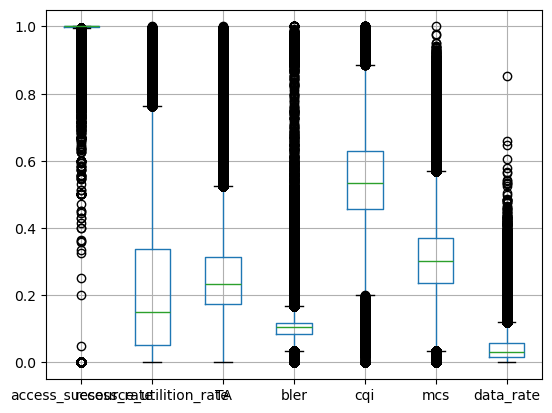

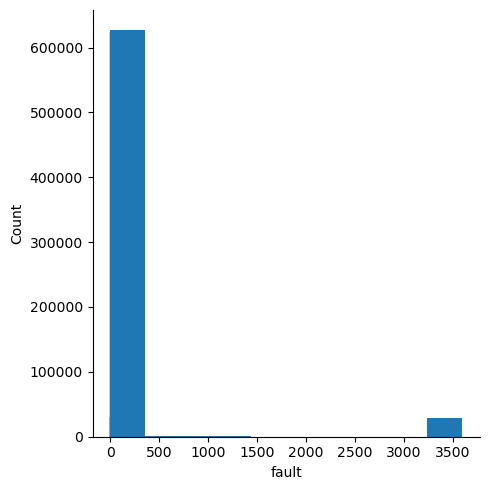

In [49]:
plt.hist(train_data['fault_duration'].values, bins=10)
plt.show()

In [50]:
import pandas as pd
import numpy as np
from scipy import stats

train_data_safe = train_data.drop(columns=['fault','fault_duration'])
train_data_no_out = train_data[(np.abs(stats.zscore(train_data_safe)) < 3).all(axis=1)]

# train_data_no_out

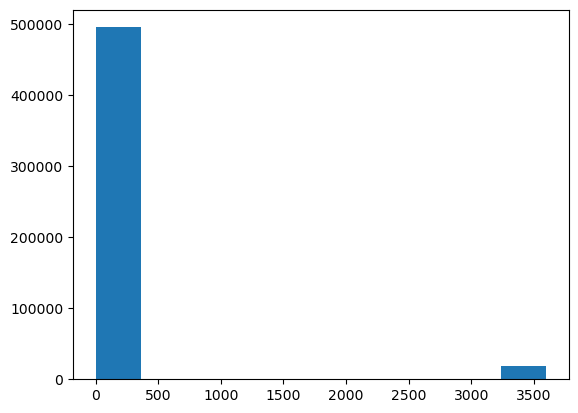

In [51]:
plt.hist(train_data_no_out['fault_duration'].values, bins=10)
plt.show()

## IMBLEARN

In [52]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(train_data.drop(columns='fault').values, train_data.fault)

In [53]:
ros = RandomOverSampler(random_state=42)
X_res_2, y_res_2 = ros.fit_resample(train_data_no_out.drop(columns='fault').values, train_data_no_out.fault)

In [54]:
imblearn_ROS_df = pd.DataFrame(columns=train_data.columns)
imblearn_ROS_df[train_data.drop(columns='fault').columns] = X_res
imblearn_ROS_df['fault'] = y_res

imblearn_ROS_df

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,access_success_rate_rol_mean,access_success_rate_rol_std,access_success_rate_rol_diff,...,mcs_rol_diff,mcs_rol_kurt,mcs_rol_skew,data_rate_rol_mean,data_rate_rol_std,data_rate_rol_diff,data_rate_rol_kurt,data_rate_rol_skew,fault_duration,fault
0,1.000000,0.127677,0.538162,0.113707,0.429061,0.276514,0.025605,0.995149,0.012043,0.501779,...,0.536108,0.179575,0.423934,0.066127,0.008357,0.550252,0.886361,0.218993,0.0,0
1,0.999531,0.608709,0.305742,0.116331,0.456849,0.297816,0.006985,0.998877,0.000776,0.500297,...,0.498119,0.044590,0.435357,0.032880,0.014163,0.546119,0.886522,0.773801,0.0,0
2,0.999621,0.730318,0.226849,0.113337,0.565308,0.337880,0.037252,0.999902,0.000300,0.499811,...,0.499008,0.638343,0.416801,0.082154,0.018032,0.557024,0.886004,0.305895,0.0,0
3,0.994106,0.219020,0.299839,0.117108,0.444325,0.287469,0.011711,0.995044,0.004022,0.498221,...,0.489723,0.410458,0.481370,0.038186,0.007826,0.543631,0.885311,0.656712,0.0,0
4,0.995989,0.435438,0.257294,0.129451,0.407962,0.262444,0.007944,0.993032,0.007671,0.500572,...,0.509534,0.474566,0.313064,0.024499,0.003082,0.545241,0.884920,0.350201,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876222,0.999641,0.508946,0.299082,0.115990,0.433979,0.311674,0.027162,0.999411,0.000943,0.499820,...,0.501367,0.187369,0.388978,0.051677,0.011854,0.551305,0.886742,0.776579,3600.0,2
1876223,0.999471,0.229100,0.139909,0.122607,0.503573,0.303651,0.035806,0.999666,0.000558,0.500021,...,0.487077,0.635779,0.728909,0.101127,0.029540,0.546910,0.887119,0.759902,3600.0,2
1876224,1.000000,0.019498,0.052244,0.041447,0.538350,0.253239,0.077430,1.000000,0.000000,0.500000,...,0.550131,0.629344,0.716341,0.139154,0.047355,0.560941,0.886386,0.424227,1012.0,2
1876225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.500000,0.039996,0.499987,0.000000,0.000000,0.546215,0.884604,0.497123,3600.0,2


In [55]:
imblearn_ROS_df_2 = pd.DataFrame(columns=train_data_no_out.columns)
imblearn_ROS_df_2[train_data_no_out.drop(columns='fault').columns] = X_res_2
imblearn_ROS_df_2['fault'] = y_res_2

imblearn_ROS_df_2

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,access_success_rate_rol_mean,access_success_rate_rol_std,access_success_rate_rol_diff,...,mcs_rol_diff,mcs_rol_kurt,mcs_rol_skew,data_rate_rol_mean,data_rate_rol_std,data_rate_rol_diff,data_rate_rol_kurt,data_rate_rol_skew,fault_duration,fault
0,1.000000,0.127677,0.538162,0.113707,0.429061,0.276514,0.025605,0.995149,0.012043,0.501779,...,0.536108,0.179575,0.423934,0.066127,0.008357,0.550252,0.886361,0.218993,0.0,0
1,0.999531,0.608709,0.305742,0.116331,0.456849,0.297816,0.006985,0.998877,0.000776,0.500297,...,0.498119,0.044590,0.435357,0.032880,0.014163,0.546119,0.886522,0.773801,0.0,0
2,0.999621,0.730318,0.226849,0.113337,0.565308,0.337880,0.037252,0.999902,0.000300,0.499811,...,0.499008,0.638343,0.416801,0.082154,0.018032,0.557024,0.886004,0.305895,0.0,0
3,0.994106,0.219020,0.299839,0.117108,0.444325,0.287469,0.011711,0.995044,0.004022,0.498221,...,0.489723,0.410458,0.481370,0.038186,0.007826,0.543631,0.885311,0.656712,0.0,0
4,0.995989,0.435438,0.257294,0.129451,0.407962,0.262444,0.007944,0.993032,0.007671,0.500572,...,0.509534,0.474566,0.313064,0.024499,0.003082,0.545241,0.884920,0.350201,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483402,1.000000,0.052088,0.210569,0.095367,0.665376,0.283669,0.043477,1.000000,0.000000,0.500000,...,0.479805,0.153390,0.516580,0.117075,0.018038,0.553079,0.886317,0.376594,3600.0,2
1483403,0.999521,0.146664,0.351100,0.144824,0.518287,0.280062,0.049656,0.996214,0.013741,0.500016,...,0.505695,0.505337,0.200406,0.143219,0.042695,0.545262,0.886951,0.682009,3600.0,2
1483404,1.000000,0.163759,0.236512,0.123802,0.753382,0.531035,0.008048,0.999092,0.002963,0.500000,...,0.506722,0.688149,0.184667,0.028585,0.021757,0.542150,0.885728,0.685902,3600.0,2
1483405,0.998643,0.094126,0.142005,0.076146,0.508974,0.307746,0.062936,0.999033,0.002778,0.499322,...,0.538204,0.202805,0.557478,0.123794,0.028863,0.565644,0.886285,0.546356,3600.0,2


In [56]:
sns.displot(imblearn_ROS_df.sample(frac=(0.1)), x='fault')

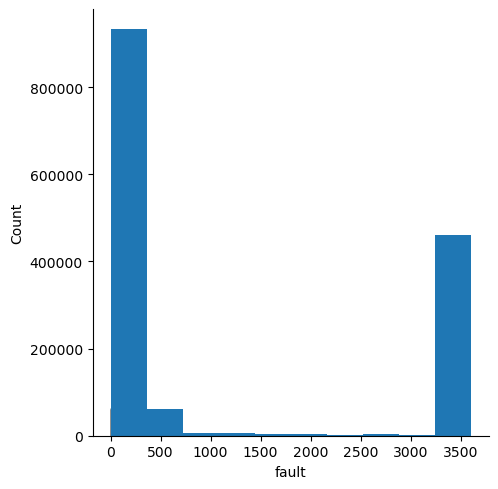

In [57]:
plt.hist(imblearn_ROS_df_2['fault_duration'].values, bins=10)
plt.show()

## Classifier Performance

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, f1_score, recall_score

def show_results(y_test, predictions):
  print('Accuracy score:', accuracy_score(y_test, predictions))
  # print('f1 score:', f1_score(y_test, predictions))
  # print('recall score:', recall_score(y_test, predictions))

  font = {'family' : 'serif', 'weight' : 'bold', 'size':18}
  plt.rc('font', **font)
  disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=None)
  disp.plot()
  plt.show()

In [59]:
import time 
def execute(model, data):
  start = time.time()
  pred = model.predict(data)
  end = time.time()
  t = end - start
  inf_t = t/len(data)

  print("time elapsed: " + "{:.4f}".format(t) + " seconds")
  print("mean inference time: "+ str(inf_t) + " seconds")
  return pred

In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def reg_acc(md, data, test_labels):
  test_predictions = md.predict(data).flatten()
  r2 = r2_score(test_labels, test_predictions)
  rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
  mae = mean_absolute_error(test_labels, test_predictions)

  print(f'r2 score: {r2}')
  print(f'rmse score: {rmse}')
  print(f'mae score: {mae}')
  # print(f'erro medio de: {rmse} segundos')

  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0,plt.xlim()[1]])
  plt.ylim([0,plt.ylim()[1]])
  _ = plt.plot([-100, 100], [-100, 100])

### imblearn

time elapsed: 64.0043 seconds
mean inference time: 0.004265246034764805 seconds
Accuracy score: 0.5925629748100759


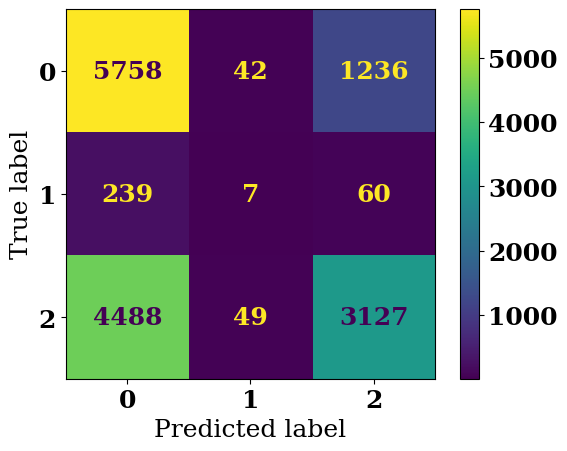

In [66]:
knearest = KNeighborsClassifier(n_neighbors = 10)
knearest = knearest.fit(imblearn_ROS_df.drop(columns=['fault','fault_duration']).values , imblearn_ROS_df['fault'].values)

knn_pred = execute(knearest, X_test_eq)
show_results(y_test_eq, knn_pred)


In [13]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=50, max_features=0.5, n_jobs=-1, random_state=0)
reg.fit(train_data.drop(columns=['fault','fault_duration']).values, train_data.fault_duration.values)



NameError: name 'reg_acc' is not defined

r2 score: 0.3303687976655587
rmse score: 604.9098658719281
mae score: 240.36861626211913


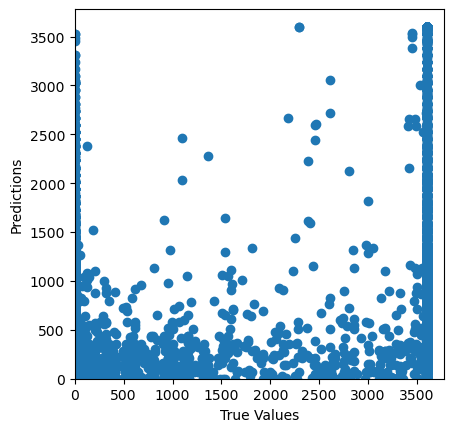

In [19]:
reg_acc(reg, X_test,y_test_fd )

/home/usr/anaconda3/envs/cnn-env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


r2 score: 0.39131485935564814
rmse score: 576.7255297998742
mae score: 249.85349999637447


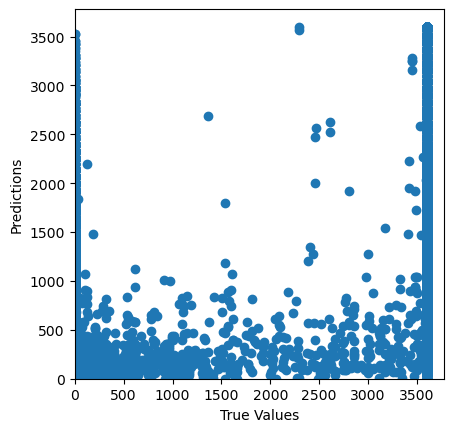

In [20]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100, max_features=0.5, n_jobs=-1, random_state=0)
reg.fit(imblearn_ROS_df.drop(columns=['fault','fault_duration']), imblearn_ROS_df['fault_duration'])

reg_acc(reg, X_test,y_test_fd )

será que removendo os 0's e os 3600's fica melhor ?

In [67]:
def relevance_deviation(y, cl, ch):
    mean = (cl + ch)/2
    arr = []
    for sample in y:
        arr.append(1 - (abs(sample - mean)/mean))

    return arr

In [68]:
faults = train_data[train_data['fault_duration'] > 0]
faults_X = faults.drop(columns=['fault','fault_duration']).values
faults_y = faults.fault_duration.values

In [69]:
import resreg

relevance = relevance_deviation(faults_y, cl=0, ch=3600)
X_train, y_train = resreg.random_oversample(faults_X,faults_y, relevance, 
                                    relevance_threshold=0.1, over="extreme", random_state=0)

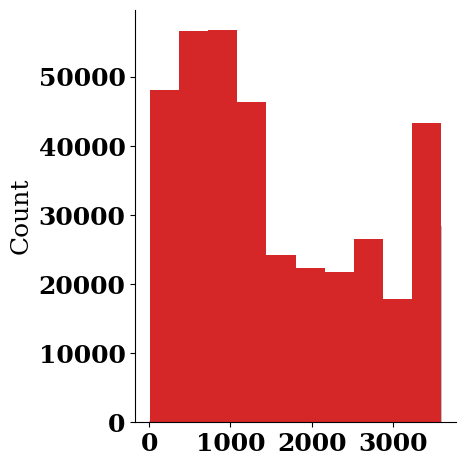

In [75]:
plt.hist(y_train, bins=10)
plt.show()

In [84]:
train_data_faults = pd.DataFrame()
train_data_faults[train_data.drop(columns=['fault','fault_duration']).columns] = X_train
train_data_faults['fault_duration'] = y_train


new_train_data = pd.concat([train_data_faults, train_data])
new_train_data = new_train_data.dropna()

X_train = new_train_data.drop(columns=['fault','fault_duration']).values
y_train = new_train_data['fault'].values

In [87]:
knearest = KNeighborsClassifier(n_neighbors = 5)
knearest = knearest.fit(X_train , y_train)

time elapsed: 24.5666 seconds
mean inference time: 0.0016371186345509811 seconds
Accuracy score: 0.5170598427295748


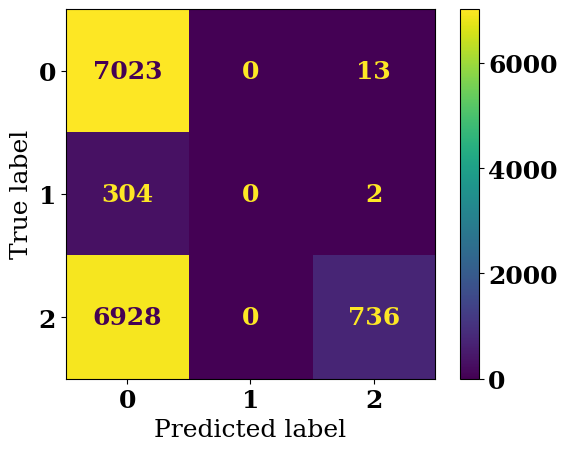

In [88]:
knn_pred = execute(knearest, X_test_eq)
show_results(y_test_eq, knn_pred)

In [46]:
fault_index = np.where(y_test_fd > 0)

r2 score: 0.07217059011240934
rmse score: 774.3907143776272
mae score: 469.8602036318096


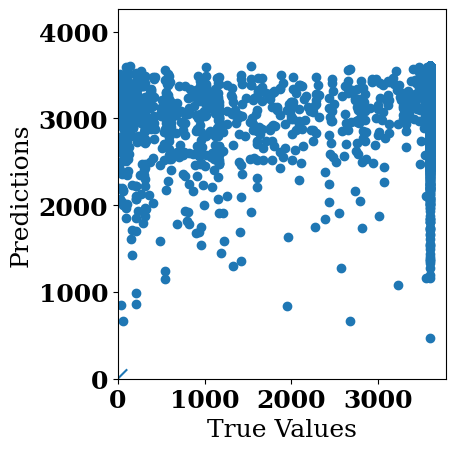

In [48]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=500, random_state=0)
reg.fit(X_train, y_train)

reg_acc(reg, X_test[fault_index],y_test_fd[fault_index] )